In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('../linear_regression/Linear_dataset.csv').values

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [3]:
X = torch.tensor(data[:,:-1], dtype=torch.float32)
y = torch.tensor(data[:,-1], dtype=torch.float32)

y = y.unsqueeze(1)

In [4]:
X.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

In [5]:
def training_loop(n_epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(1, n_epochs + 1):
        y_hat = model(x)
        # print(y_hat.shape, y.shape)
        loss = loss_fn(y_hat, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if epoch % 10 == 0:
            losses.append(loss.item())
            print(epoch, float(loss))
    
    return losses

In [6]:
linear_model = nn.Linear(2, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=0.1)

In [7]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.0757, 0.6917]], requires_grad=True),
 Parameter containing:
 tensor([0.1717], requires_grad=True)]

In [8]:
losses = training_loop(
    n_epochs=50, 
    optimizer=optimizer, 
    model=linear_model, 
    loss_fn=nn.MSELoss(), 
    x=X, 
    y=y)

10 0.03705507516860962
20 0.0005547184264287353
30 8.310759767482523e-06
40 1.245829537310783e-07
50 1.869673083021439e-09


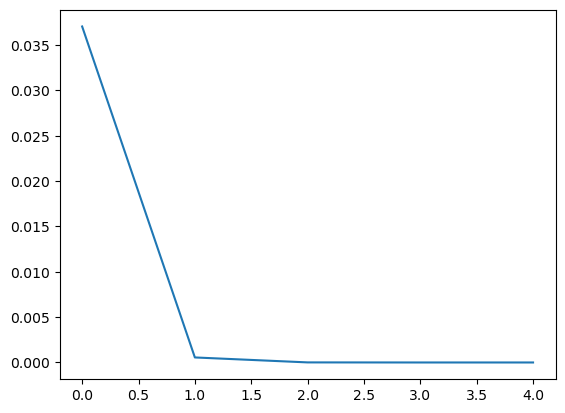

In [9]:
plt.plot(losses)
plt.show()

In [10]:
y_pred = linear_model(X).detach().numpy()

c:\Users\ChiThang\miniconda3\envs\usual\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


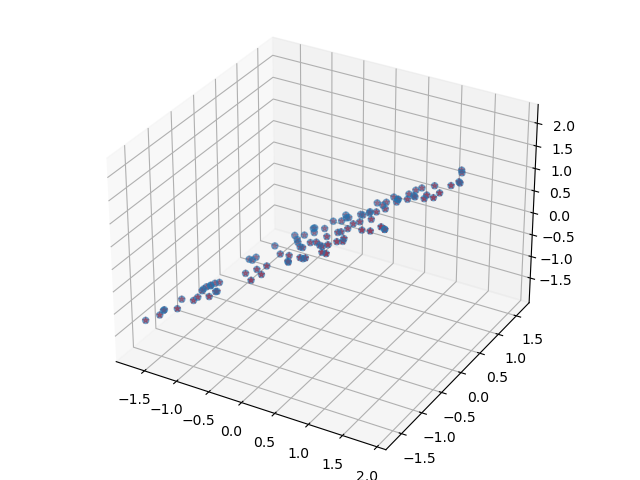

In [11]:
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], y, alpha=0.5)
ax.scatter(X[:,0], X[:,1], y_pred, marker="*", c='red')
plt.show()